In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os
import time
import numpy as np
np.random.seed(1120)
from sklearn.model_selection import train_test_split
import cv2

In [9]:
top_path = "C:/Users/jw517/mask_detection/final_data/" # 안에 chin_mask , full_mask... 로 하위 폴더가 있는 상위 폴더 경로

save_path = "C:/Users/jw517/mask_detection/mask/" # 저장할 경로 (안에 빈 train , test 폴더 먼저 만들어 놓고 실행)

folders = os.listdir(top_path)

for folder in folders:
    
    files = os.listdir(top_path+folder+'/')
    
    image_files = [file for file in files if file.endswith(".png")]
    
    image_1000 = image_files[-1000:]
    
    train,test = train_test_split(image_1000,test_size=0.1,random_state=1120)
    train,validate = train_test_split(train,test_size=(2/9),random_state=1120)
    
    for img in train:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'train/'+folder+'/'+img, original.copy())
        
    for img in validate:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'validate/'+folder+'/'+img, original.copy())
        
    for img in test:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'test/'+folder+'/'+img, original.copy())

In [11]:
directory='C:/Users/jw517/mask_detection/mask'

In [12]:
train=tf.keras.preprocessing.image_dataset_from_directory(
    directory+'/train',
    labels="inferred",
    label_mode="int",
    class_names=['chin_mask', 'full_mask', 'no_mask', 'nose_mask'],
    color_mode="rgb",
    batch_size=32,
    image_size=(227, 227),
    shuffle=False,
    seed=1120
)

Found 2800 files belonging to 4 classes.


In [13]:
validate=tf.keras.preprocessing.image_dataset_from_directory(
    directory+'/validate',
    labels="inferred",
    label_mode="int",
    class_names=['chin_mask', 'full_mask', 'no_mask', 'nose_mask'],
    color_mode="rgb",
    batch_size=32,
    image_size=(227, 227),
    shuffle=False,
    seed=1120
)

Found 800 files belonging to 4 classes.


In [14]:
test=tf.keras.preprocessing.image_dataset_from_directory(
    directory+'/test',
    labels="inferred",
    label_mode="int",
    class_names=['chin_mask', 'full_mask', 'no_mask', 'nose_mask'],
    color_mode="rgb",
    batch_size=32,
    image_size=(227, 227),
    shuffle=False,
    seed=1120
)

Found 400 files belonging to 4 classes.


In [24]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_10 (Batc (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 384)      

In [26]:
early_stopping=EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=5)

In [27]:
hist=model.fit(train,
          epochs=50,
          validation_data=validate,
          validation_freq=1,
          callbacks=[early_stopping],
          verbose=2
)

Epoch 1/50
88/88 - 340s - loss: 0.4408 - accuracy: 0.9464 - val_loss: 2.6968 - val_accuracy: 0.2500
Epoch 2/50
88/88 - 334s - loss: 0.3615 - accuracy: 0.9475 - val_loss: 2.5861 - val_accuracy: 0.2950
Epoch 3/50
88/88 - 328s - loss: 0.2911 - accuracy: 0.9482 - val_loss: 2.6728 - val_accuracy: 0.3850
Epoch 4/50
88/88 - 329s - loss: 0.2356 - accuracy: 0.9514 - val_loss: 2.7653 - val_accuracy: 0.4400
Epoch 5/50
88/88 - 358s - loss: 0.1787 - accuracy: 0.9539 - val_loss: 2.7154 - val_accuracy: 0.4913
Epoch 6/50
88/88 - 337s - loss: 0.1736 - accuracy: 0.9579 - val_loss: 2.8806 - val_accuracy: 0.5263
Epoch 7/50
88/88 - 334s - loss: 0.1323 - accuracy: 0.9668 - val_loss: 1.1312 - val_accuracy: 0.6313
Epoch 8/50
88/88 - 333s - loss: 0.1194 - accuracy: 0.9643 - val_loss: 1.1323 - val_accuracy: 0.6600
Epoch 9/50
88/88 - 338s - loss: 0.1109 - accuracy: 0.9682 - val_loss: 0.9319 - val_accuracy: 0.6388
Epoch 10/50
88/88 - 340s - loss: 0.0963 - accuracy: 0.9714 - val_loss: 0.8491 - val_accuracy: 0.7088

In [28]:
model.save('from_AlexNet.h5')

In [31]:
hist

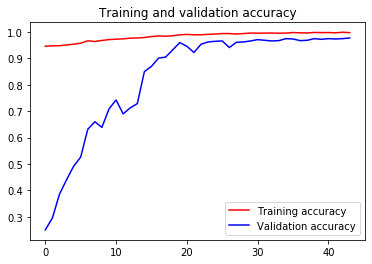

<Figure size 432x288 with 0 Axes>

In [36]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.savefig('AlexNet_accuracy')
plt.show()